# Generating PMO Comparison Plots

The aim of this file is to produce the plots that incorporate both our results on a certain benchmark, as well as the benchmarks for other methods from the PMO benchmark.

## Setup

### Change Working Directory

In [1]:
# Change working directory to the parent of the parent of the script

import os

# Get the current working directory
current_directory = os.getcwd()

# Get the parent of the parent directory
parent_parent_directory = os.path.abspath(os.path.join(current_directory, '..', '..'))

# Change the working directory to the parent of the parent directory
os.chdir(parent_parent_directory)

# Verify the change by printing the new working directory
print("New working directory:", os.getcwd())


New working directory: /Users/gordianimperial/Documents/Group Project/bo_molecules


### Imports

In [26]:
# Standard library imports
import random


# Third-party imports
import gpytorch
import torch
import json
from tdc import Oracle
from gauche.kernels.graph_kernels import WeisfeilerLehmanKernel
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from gauche import SIGP, NonTensorialInputs

from botorch.fit import fit_gpytorch_mll, fit_gpytorch_mll
from botorch.settings import debug
from botorch.exceptions.errors import ModelFittingError

In [1]:
# Module Imports
from modules.benchmarking.metrics_and_benchmarking import accumulate_top_n
from modules.utils.read_sample_store import read_compressed_or_regular_json, buffer_to_dataframe

ModuleNotFoundError: No module named 'modules'

### Specifications

In [59]:
buffer_file_path = "experiments/results/zaleplon_mpo/2024-04-22_20-31-51_zaleplon_mpo_3000/buffer.json.gz"

In [60]:
path_for_line_gp_bo = "experiments/pmo_benchmarking_comparison_plots/lines_from_graph_paper/albuterol_similarity/gp_bo.json"
path_for_line_graph_ga = "experiments/pmo_benchmarking_comparison_plots/lines_from_graph_paper/albuterol_similarity/graph_ga.json"
path_for_line_mol_pal = "experiments/pmo_benchmarking_comparison_plots/lines_from_graph_paper/albuterol_similarity/mol_pal.json"
path_for_line_reinvent = "experiments/pmo_benchmarking_comparison_plots/lines_from_graph_paper/albuterol_similarity/reinvent.json"

In [61]:
# Specifications for the plot

x_min = 0
x_max = 3000
y_min = 0
y_max = 1.1

### Load buffer from experiment and create top 10 curve

In [62]:
data = read_compressed_or_regular_json(buffer_file_path)
results_df = buffer_to_dataframe(data)

oracle_name = buffer_file_path.split("/")[2]
print(oracle_name)


zaleplon_mpo


In [63]:
# Load lines from the graph paper
with open(path_for_line_gp_bo, 'r') as file:
    line_gp_bo = json.load(file)

with open(path_for_line_graph_ga, 'r') as file:
    line_graph_ga = json.load(file)

with open(path_for_line_mol_pal, 'r') as file:
    line_mol_pal = json.load(file)

with open(path_for_line_reinvent, 'r') as file:
    line_reinvent = json.load(file)

### Loading training & test data

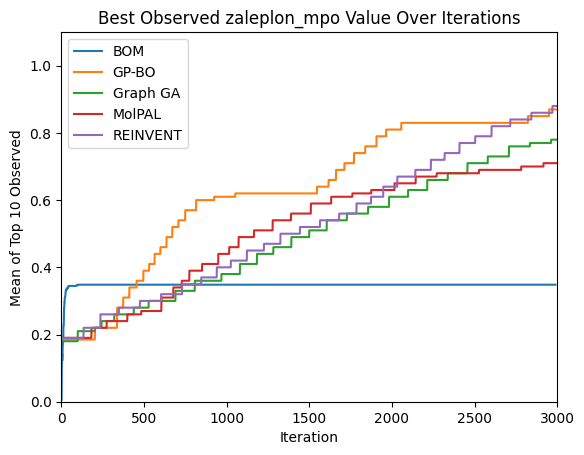

In [64]:
array = accumulate_top_n(results_df['oracle_score'], 10)

plt.plot(array)
plt.xlabel('Iteration')
plt.ylabel(f'Mean of Top {10} Observed')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title(f'Best Observed {oracle_name} Value Over Iterations')

# Load the lines from the graph paper
plt.plot(line_gp_bo, label='GP-BO', marker = None)
plt.plot(line_graph_ga, label='Graph GA', marker = None)
plt.plot(line_mol_pal, label='MolPAL', marker = None)
plt.plot(line_reinvent, label='REINVENT', marker = None)

plt.legend(['BOM', 'GP-BO', 'Graph GA', 'MolPAL', 'REINVENT'])

# file_path_suffix = f'Best_observed_top_{10}.png'
# plot_path = os.path.join(results_dir, file_path_suffix)
# print(plot_path)
# plt.savefig(plot_path)
plt.show()
plt.close()

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is already loaded into these lists or arrays:
iterations = range(1, 10001, 1)  # Example to generate x-values for plotting
data = {
    'Iteration': iterations,  # Repeat 'iterations' for each line
    'Performance': line_gp_bo + line_graph_ga + line_mol_pal + line_reinvent,
    'Method': ['GP-BO'] * len(line_gp_bo) + ['Graph GA'] * len(line_graph_ga) + 
              ['MolPAL'] * len(line_mol_pal) + ['REINVENT'] * len(line_reinvent)
}

df = pd.DataFrame(data)

# Creating the line plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
sns.lineplot(data=df, x='Iteration', y='Performance', hue='Method', marker=None)

# Setting the axis labels and title
plt.xlabel('Iteration')
plt.ylabel(f'Mean of Top 10 Observed')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.title(f'Best Observed {oracle_name} Value Over Iterations')

# Adding a legend
plt.legend(title='Method')

# Save the plot if needed (commented out for now)
# plot_path = os.path.join(results_dir, f'Best_observed_top_10.png')
# plt.savefig(plot_path)

# Display the plot
plt.show()
plt.close()


ValueError: All arrays must be of the same length